## Generalidades
y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

#### se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.

In [4]:
# Importando las libreríass a utilizar
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Importando Data a utilizar en el proyecto:

data_total = np.load('C:/Users/Gary/Google Drive/Universidad/MAESTRIA/Data Science/Año 1/1. Trimestre I/2. Ciencia de Datos en Python/Tareas/Proyecto Final/proyecto_data/proyecto_training_data.npy')
data_total.shape


(1460, 6)

In [6]:
#utilizando Slicing para dividir el dataset
#Se usará el 80% para los "Datos de entrenamiento"
Parte1 = round(len(data_total)*0.8)
data_entrenamiento = data_total[0:int(data_total.shape[0]*.8)+1]

#Se usará el 20% para "Datos de validación y pruebas"
Parte2 = round(len(data_total)*0.2)
data_validacion = data_total[int(data_total.shape[0]*.8)+1:]

#Validacion de las dos partes:
print("Data Total: ")
print(data_total.shape)
print("Data Entrenamiento: ")
print(data_entrenamiento.shape)

print("Data Validacion: ")
print(data_validacion.shape)


Data Total: 
(1460, 6)
Data Entrenamiento: 
(1169, 6)
Data Validacion: 
(291, 6)


In [7]:
#Análisis Exploratorio de Datos:
#Media de las variables
numero = 0
while numero < 6:
    print("Media Columna: ", numero)
    print(round(np.mean(data_entrenamiento[:,numero]),2))
    print("Valor Maximo Columna: ", numero)
    print(round(np.max(data_entrenamiento[:,numero]),2))
    print("Valor Minimo Columna: ", numero)
    print(round(np.min(data_entrenamiento[:,numero]),2))
    print("Rango Columna ", numero)
    print(round(np.ptp(data_entrenamiento[:,numero]),2))
    print("Desvacion Estandard Columna: ", numero)
    print(round(np.std(data_entrenamiento[:,numero]),2))

    numero+=1
    

Media Columna:  0
180636.82
Valor Maximo Columna:  0
755000.0
Valor Minimo Columna:  0
34900.0
Rango Columna  0
720100.0
Desvacion Estandard Columna:  0
78764.31
Media Columna:  1
6.1
Valor Maximo Columna:  1
10.0
Valor Minimo Columna:  1
1.0
Rango Columna  1
9.0
Desvacion Estandard Columna:  1
1.38
Media Columna:  2
1156.39
Valor Maximo Columna:  2
3228.0
Valor Minimo Columna:  2
334.0
Rango Columna  2
2894.0
Desvacion Estandard Columna:  2
373.47
Media Columna:  3
6.49
Valor Maximo Columna:  3
14.0
Valor Minimo Columna:  3
2.0
Rango Columna  3
12.0
Desvacion Estandard Columna:  3
1.61
Media Columna:  4
1971.42
Valor Maximo Columna:  4
2010.0
Valor Minimo Columna:  4
1875.0
Rango Columna  4
135.0
Desvacion Estandard Columna:  4
29.95
Media Columna:  5
nan
Valor Maximo Columna:  5
nan
Valor Minimo Columna:  5
nan
Rango Columna  5
nan
Desvacion Estandard Columna:  5
nan


C:\Users\Gary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:ylabel='Density'>

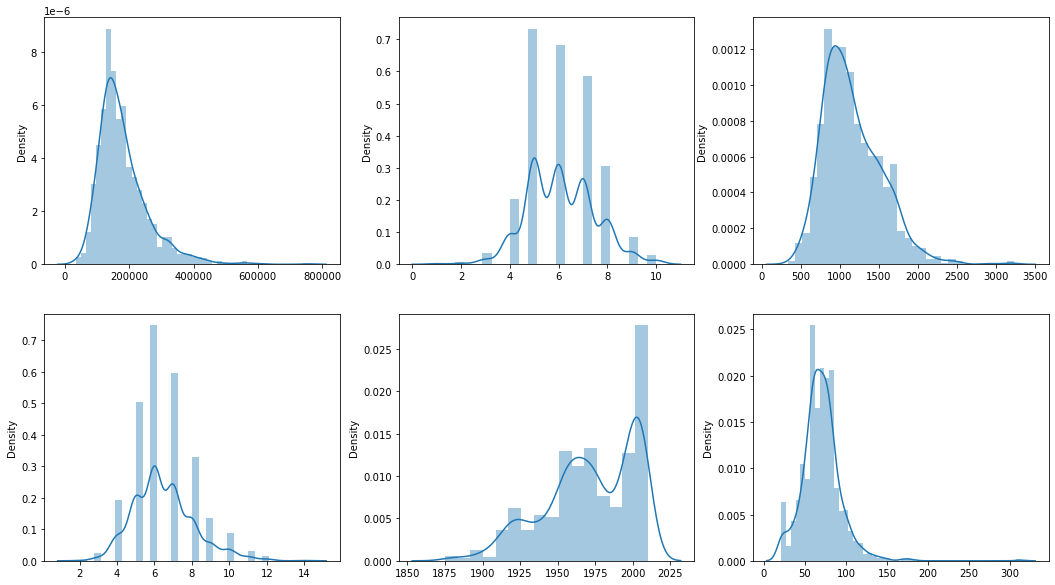

In [8]:
fig, ae = plt.subplots(2,3, figsize=(18,10))
sns.distplot(data_entrenamiento[:,0],ax=ae[0,0])
sns.distplot(data_entrenamiento[:,1],ax=ae[0,1])
sns.distplot(data_entrenamiento[:,2],ax=ae[0,2])
sns.distplot(data_entrenamiento[:,3],ax=ae[1,0])
sns.distplot(data_entrenamiento[:,4],ax=ae[1,1])
sns.distplot(data_entrenamiento[:,5],ax=ae[1,2])

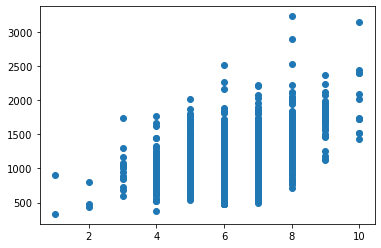

In [9]:
plt.scatter(data_entrenamiento[:,1],data_entrenamiento[:,2])

C:\Users\Gary\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


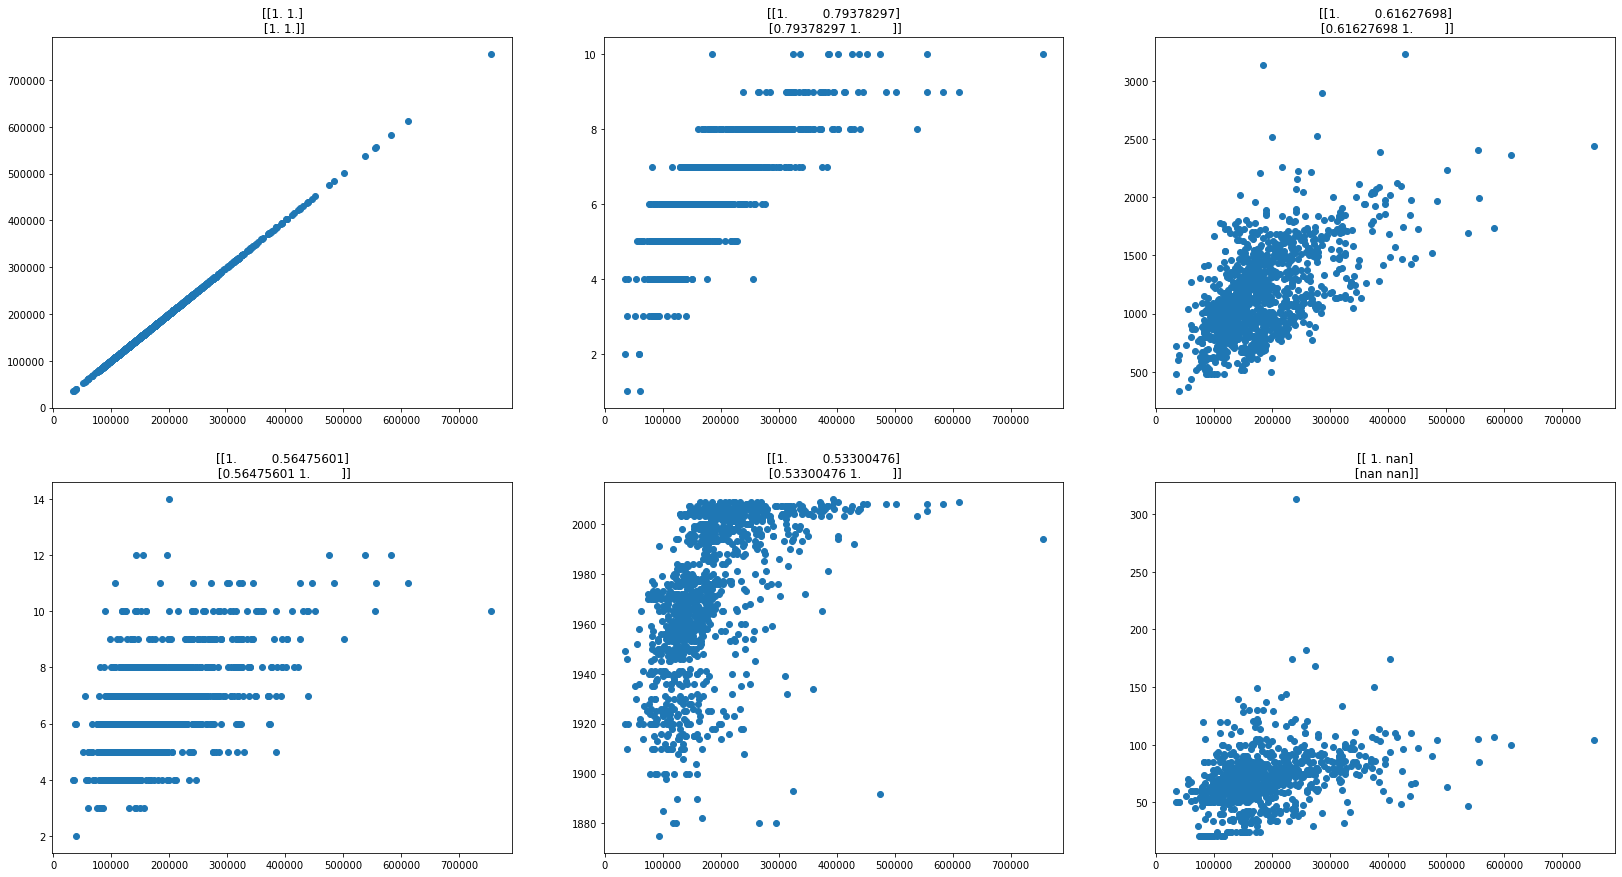

In [10]:
numero = 0
while numero < 1 :
    
    fig, ae = plt.subplots(2,3, figsize=(28,15))
    numero2 = 0
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,0])
    ae[0,0].title.set_text(rela)
    ae[0,0].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,0])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,1])
    ae[0,1].title.set_text(rela)
    ae[0,1].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,1])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,2])
    ae[0,2].title.set_text(rela)
    ae[0,2].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,2])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,3])
    ae[1,0].title.set_text(rela)
    ae[1,0].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,3])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,4])
    ae[1,1].title.set_text(rela)
    ae[1,1].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,4])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,5])
    ae[1,2].title.set_text(rela)
    ae[1,2].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,5])
    numero+=1

### Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.



In [27]:
def func_proyecto(x,y,epo,print_flag,lr_rate):
  
    vect_1 = np.ones_like(x)
    grad_m = np.zeros_like(x)
    error_array = np.array([0,0])
    i_carga = np.array([0,0])
    

    valores_m_b= np.array([[0.000,0.0000]])
    vector = np.vstack((x,vect_1))
    y_modelo = np.array([[0.000,0.0000,0.000,0.000]])
    y_modelo1 = np.array([[0.000,0.0000,0.000]])
        
    #Multiplicacion por cada epoch:
    for i in range (0,epo):
        #La formula de Yhat = mx+b
        cont_global = 0 #sirve para guardar en el array de la formula
        yhat = np.matmul(valores_m_b,vector)
        #print("Esto es yhat", yhat)
        yhat.transpose
        error = np.power((yhat-y),2)/2
        error_prom = np.average(error)
    
        val = np.array([i,error_prom])
        #print("error_prom", error_prom)
        error_array = np.vstack((error_array,val))
                 
              
        grad_m = (yhat-y)*x
        #print("Gradm",grad_m)
        grad_b = (yhat-y)
        #print("Gradb",grad_b)
        grad_prom_m = np.average(grad_m)
        #print("grad_prom_m", grad_prom_m)
        grad_prom_b = np.average(grad_b)
        #print("grad_prom_b", grad_prom_b)
        param_m = valores_m_b[:,0]-lr_rate*grad_prom_m
        #print("Param_m", param_m)
        param_b = valores_m_b[:,1]-lr_rate*grad_prom_b
        #print("Param_b",param_b)
    
    
        #Y modelo entrenado en el tiempo, se guarda el numero de iteración y el valor de la formula:
        #m y b
       
        t=0
        for t in range(0,len(param_m)):
            i_carga[cont_global+t] = i
        
        y_modelo_1 = np.stack((param_m, param_b), axis = -1)
        #print("y_modelo1",y_modelo_1)
        
        y_modelo = np.vstack((y_modelo,(np.append(i_carga, y_modelo_1))))
        #print(y_modelo)
        #---------------------------------------------
    
    
    
    
        valores_m_b[:,0] = param_m
        valores_m_b[:,1] = param_b
        cont_global+=1

        
        if (i+1)%print_flag == 0 and i > 0:
            print("Error: ", error_prom)
    y_modelo = y_modelo[1:,:]
    #print("ymodelo final", y_modelo)
    return (error_array, y_modelo)               


In [29]:
#Aqui hay que probar lo del excel para ver como funciona
error_val, modelo = func_proyecto([65,80,68],[208.5,181.5,223.5],10,2,0.0001)


Error:  5542.5714866175
Error:  885.8178756090729
Error:  613.838209046619
Error:  597.951493435833
Error:  597.0218999895303


In [13]:
def calculo_yhat(valores_m_b, x):
    vect_1 = np.ones_like(x)
    vector = np.vstack((x,vect_1))
    yhat = np.matmul(valores_m_b,vector)
    
    return yhat

In [30]:
#Fución que grafica el cambio del error
def tiempo_error(val_error):

    x = val_error[:,0]
    y = val_error[:,1]
    x_n = x[1:(len(x))]
    y_n = y[1:(len(y))]

    plt.plot(x_n,y_n)
    plt.title("Cambio del error respecto a su iteracion")
    plt.xlabel('Iteracion')
    plt.ylabel('Error')
    plt.show

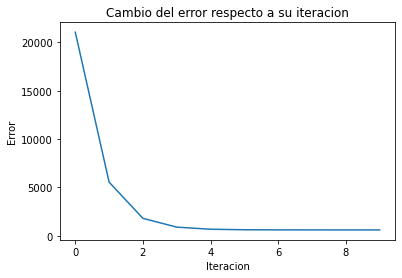

In [31]:
tiempo_error(error_val)

## ●	Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo 

In [110]:
def modelo_tiempo(modelo,iter,x,y):
    fig, axq = plt.subplots(1,1,figsize=(20, 10))
    axq.scatter(x, y,  color='black')
    # Train the model using the training sets
    for  val  in range(len(modelo)):
        if modelo[val,0:1] > 0:
            if modelo[val,0:1] % iter == 0 :
                #print("y", modelo[val,2:4])
                #x y yhat
                yhat = calculo_yhat(modelo[val,2:4],x)
                axq.plot(x, yhat,label="iteracion=%d"%(val,), linewidth=4)
            
    fact = axq.legend(loc='upper left', ncol=1, shadow=True, fancybox=True)
    fact.get_frame().set_alpha(0.5)


    plt.show()

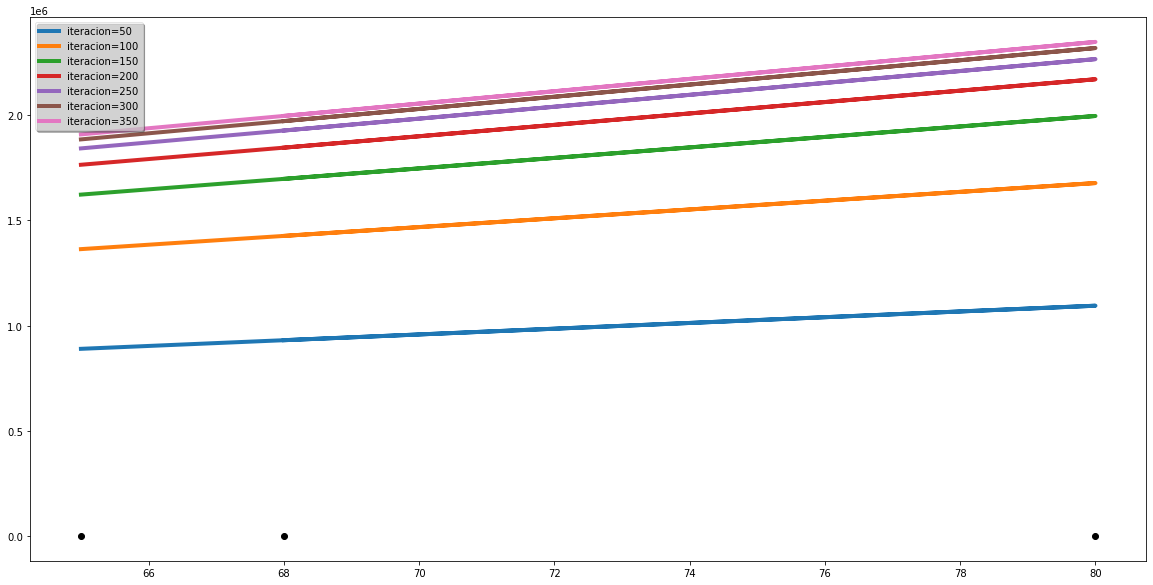

In [113]:

modelo_tiempo(modelo, 50,[65,80,68],[208.5,181.5,223.5])



## ●	Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal y=mx +  b , para cada una de las variables “x” elegidas

Error:  10331123826.29802
Error:  5719827267.126248
Error:  3487756969.4394493
Error:  2407280979.454395
Error:  1884200300.7323751
Error:  1630910455.131276
Error:  1508204987.6298513
Error:  1448705124.2382922
Error:  1419798158.9632313
Error:  1405698874.4143016
Error:  1398766902.1588619
Error:  1395304147.3922532
Error:  1393520656.4477108
Error:  1392550055.030639
Error:  1391973000.1691399
Error:  1391586521.2026982


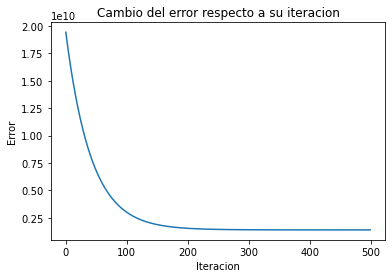

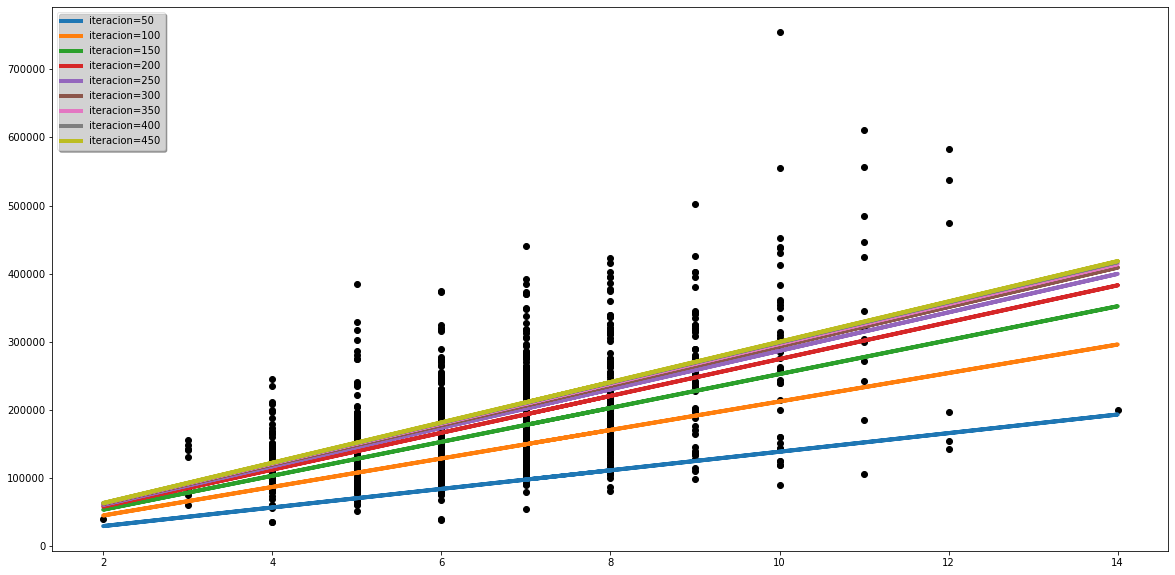

In [120]:
error_val, modelo = func_proyecto(data_entrenamiento[:,1],data_entrenamiento[:,0],500,30,0.0003)
tiempo_error(error_val)
modelo_tiempo(modelo, 50,data_entrenamiento[:,3],data_entrenamiento[:,0])


### usar scikit-learn para entrenar un modelo de regresión lineal:
Las 2 variables elegidas son la 1 y la 3 

In [151]:
def func_scikit(data_entrena,var_rec):

    #Regresión para variable 0
    #print(var_rec)
    regr = linear_model.LinearRegression()
    regr.fit(np.transpose(data_entrena[:,var_rec].reshape(1,-1)),data_entrena[:,0])
    pred_y = regr.predict(np.transpose(data_entrena[:,var_rec].reshape(1,-1)))
   
    #plt.scatter(data_entrena[:,var_rec], data_entrena[:,0],  color='black')
    #plt.plot(data_entrena[:,var_rec], pred_y, color='yellow', linewidth=3)

    #plt.title('Variable No.  ' + str(var_rec))
    #plt.xticks(())
    #plt.yticks(())

    #plt.show()
    
   
    return pred_y

In [152]:
func_scikit(data_entrenamiento,1)

func_scikit(data_entrenamiento,3)

array([222526.58316807, 167194.23093816, 167194.23093816, ...,
       194860.40705311, 194860.40705311, 194860.40705311])

### ●	Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos


In [155]:
def manual_vs_scikit(data_entrena):
    var_rec = 1
    f_c = func_scikit(data_entrena,var_rec)
    error_val, modelo = func_proyecto(data_entrenamiento[:,var_rec],data_entrenamiento[:,0],500,30,0.0003)
    #500 porque creo que es el valor optimo que tengo
    f_m = calculo_yhat(modelo[499,2:4],data_entrenamiento[:,var_rec]) #Vector X
    prom_pred = (f_m*f_c)/2
    #print(prom_pred.shape)
    #print("f_m", f_m.shape, "f_C", f_c.shape)
    return f_m, f_c, prom_pred

In [156]:
manual_vs_scikit(data_entrenamiento)


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='error')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

Error:  10331123826.29802
Error:  5719827267.126248
Error:  3487756969.4394493
Error:  2407280979.454395
Error:  1884200300.7323751
Error:  1630910455.131276
Error:  1508204987.6298513
Error:  1448705124.2382922
Error:  1419798158.9632313
Error:  1405698874.4143016
Error:  1398766902.1588619
Error:  1395304147.3922532
Error:  1393520656.4477108
Error:  1392550055.030639
Error:  1391973000.1691399
Error:  1391586521.2026982


(array([211623.33885182, 181948.85557435, 211623.33885182, ...,
        241297.8221293 , 181948.85557435, 181948.85557435]),
 array([221462.47251958, 176053.16103015, 221462.47251958, ...,
        266871.784009  , 176053.16103015, 176053.16103015]),
 array([2.34333139e+10, 1.60163356e+10, 2.34333139e+10, ...,
        3.21977901e+10, 1.60163356e+10, 1.60163356e+10]))